## Sistemas de tránsito del mundo.


### Acerca del conjunto de datos
- Contexto

¿Cómo fue la ampliación del metro de Londres, el primer ferrocarril subterráneo del mundo inaugurado en 1863? ¿Qué pasa con el sistema de transporte en su ciudad natal? Citylines recopila datos sobre líneas de transporte en todo el mundo para que puedas responder preguntas como estas y más.

- Contenido

Este conjunto de datos, originalmente compartido y actualizado aquí, incluye datos de líneas de transporte de varias ciudades de todo el mundo, incluidas Londres, Berlín, Ciudad de México, Barcelona, Washington D.C. y otras que cubren muchos miles de kilómetros de líneas.

- Inspiración

Puedes explorar geometrías para generar mapas e incluso ver cómo las líneas han cambiado con el tiempo basándose en registros históricos.  

https://www.kaggle.com/datasets/citylines/city-lines

### 1. Importar las librerías necesarias


In [ ]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
from shapely import wkt





### 2. Cargar el dataset


In [99]:
# Cargar el archivo CSV
df = pd.read_csv('cities.csv')

# Extraer las coordenadas x e y de la columna 'coords'
df['coords'] = df['coords'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry='coords')

# Guardar el GeoDataFrame como un archivo Shapefile
gdf.to_file('cities.shp')

<ipython-input-99-3a26d6ed3117>:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('cities.shp')


### 3. Explorar el dataset


In [102]:
# Ver las primeras filas del dataset
paradas_bus.head()

,id,name,start_year,url_name,country,country_st,geometry,latitude,longitude
0,5,Aberdeen,2017.0,aberdeen,Scotland,None,POINT (-2.15000 57.15000),57.150000,-2.150000
1,6,Adelaide,2017.0,adelaide,Australia,None,POINT (138.60000 -34.91667),-34.916667,138.600000
2,7,Algiers,2017.0,algiers,Algeria,None,POINT (3.00000 36.83333),36.833333,3.000000
3,9,Ankara,2017.0,ankara,Turkey,None,POINT (32.91667 39.91667),39.916667,32.916667
4,16,Belém,2017.0,belem,Brazil,None,POINT (-48.48333 -1.46667),-1.466667,-48.483333


In [103]:
# Obtener información general sobre el dataset
paradas_bus.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          334 non-null    int64   
 1   name        334 non-null    object  
 2   start_year  331 non-null    float64 
 3   url_name    334 non-null    object  
 4   country     334 non-null    object  
 5   country_st  134 non-null    object  
 6   geometry    334 non-null    geometry
 7   latitude    334 non-null    float64 
 8   longitude   334 non-null    float64 
dtypes: float64(3), geometry(1), int64(1), object(4)
memory usage: 23.6+ KB


In [104]:
# Resumen estadístico del dataset
paradas_bus.describe()

,id,start_year,latitude,longitude
count,334.000000,331.000000,334.000000,334.000000
mean,169.505988,1998.003021,31.863178,-31.508979
std,96.592850,46.642905,24.161690,70.439281
min,1.000000,1806.000000,-42.866667,-165.500000
25%,86.250000,2017.000000,29.475000,-86.820833
50%,169.500000,2017.000000,40.775000,-52.330021
75%,252.750000,2017.000000,46.816667,6.002212
max,338.000000,2018.000000,70.633333,174.783333


In [108]:
# Contar valores únicos en una columna
print(df['start_year'].value_counts())

2017.0    208
2018.0     47
1854.0      2
1872.0      2
1994.0      2
         ... 
2010.0      1
1924.0      1
1860.0      1
1934.0      1
1991.0      1
Name: start_year, Length: 68, dtype: int64


###  4. Preprocesamiento de datos



In [110]:
# Convertir la columna 'start_year' a tipo datetime
paradas_bus['start_year'] = pd.to_datetime(paradas_bus['start_year'], format='%Y')





In [106]:
# Eliminar filas con valores nulos si es necesario
paradas_bus.dropna(inplace=True)

### 5. Análisis de la distribución de líneas de transporte a lo largo de los años


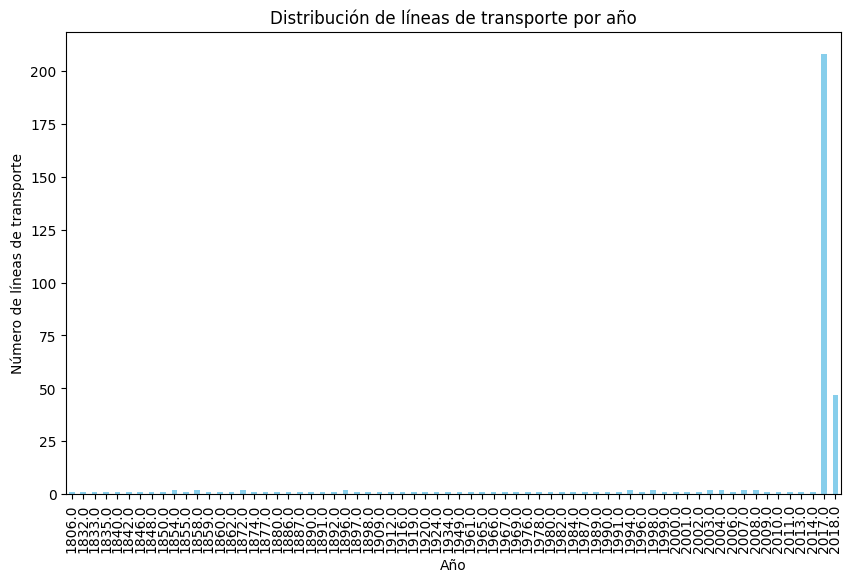

In [115]:
# Contar el número de líneas de transporte por año
lineas_por_anio = paradas_bus.groupby(paradas_bus['start_year'].dt.year).size()

# Visualizar la distribución de líneas de transporte a lo largo de los años
plt.figure(figsize=(10, 6))
lineas_por_anio.plot(kind='bar', color='skyblue')
plt.title('Distribución de líneas de transporte por año')
plt.xlabel('Año')
plt.ylabel('Número de líneas de transporte')
plt.xticks(rotation=90)

plt.show()


###  *Mapa* de puntos de la distribución geográfica de las líneas de transporte

Text(80.59722222222221, 0.5, 'Latitud')

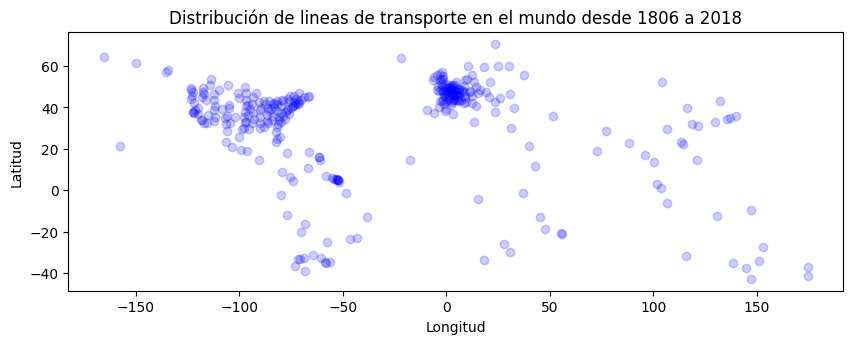

In [120]:
ax = paradas_bus.plot(figsize=(10,10), color='blue', alpha=0.2)
ax.set_title('Distribución de lineas de transporte en el mundo desde 1806 a 2018' )
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

###  *Mapa* de calor de la distribución geográfica de las líneas de transporte


In [117]:
# Crear mapa de calor
m = folium.Map(location=[paradas_bus.geometry.y.mean(), paradas_bus.geometry.x.mean()], zoom_start=2)
heat_data = paradas_bus[['geometry']].apply(lambda row: [row['geometry'].y, row['geometry'].x], axis=1).tolist()
HeatMap(heat_data).add_to(m)

# Mostrar mapa
display(m)



### 7. Análisis estadístico y visualizaciones adicionales


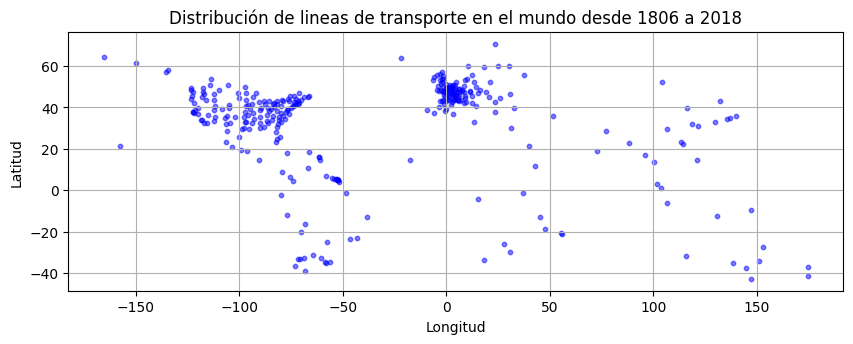

In [123]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


# Crear un gráfico de dispersión de las paradas de autobús
plt.figure(figsize=(10, 8))
paradas_bus.plot(ax=plt.gca(), markersize=10, color='blue', alpha=0.5)
plt.title('Distribución de lineas de transporte en el mundo desde 1806 a 2018')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()



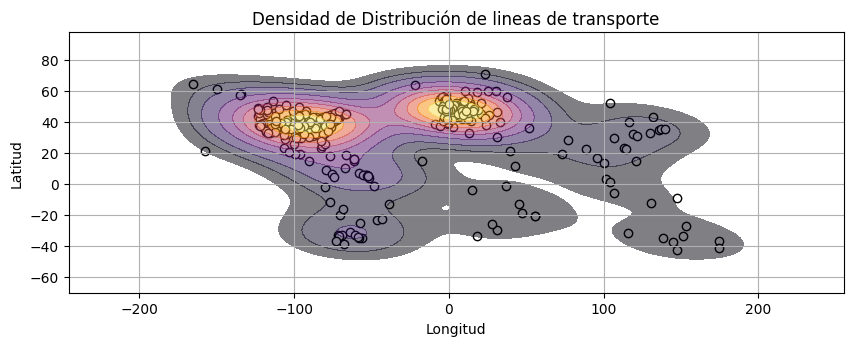

In [127]:

import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
paradas_bus = gpd.read_file('/content/cities.shp')

# Extraer las coordenadas x e y de las geometrías
paradas_bus['x'] = paradas_bus.geometry.x
paradas_bus['y'] = paradas_bus.geometry.y

# Calcular la densidad de Distribución de lineas de transporte por área y visualizarla como un mapa de calor
plt.figure(figsize=(10, 8))
paradas_bus.plot(ax=plt.gca(), color='white', edgecolor='black')
sns.kdeplot(data=paradas_bus, x='x', y='y', cmap='inferno', fill=True, thresh=0.05, alpha=0.5, ax=plt.gca())
plt.title('Densidad de Distribución de lineas de transporte')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()



### Analisis de agrupamiento

In [128]:

# Realizar un análisis de agrupamiento (clustering) utilizando k-means
from sklearn.cluster import KMeans

# Extraer las coordenadas como características para el clustering
X = paradas_bus[['geometry']].apply(lambda row: [row['geometry'].x, row['geometry'].y], axis=1).tolist()

# Determinar el número óptimo de clusters utilizando el método del codo
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

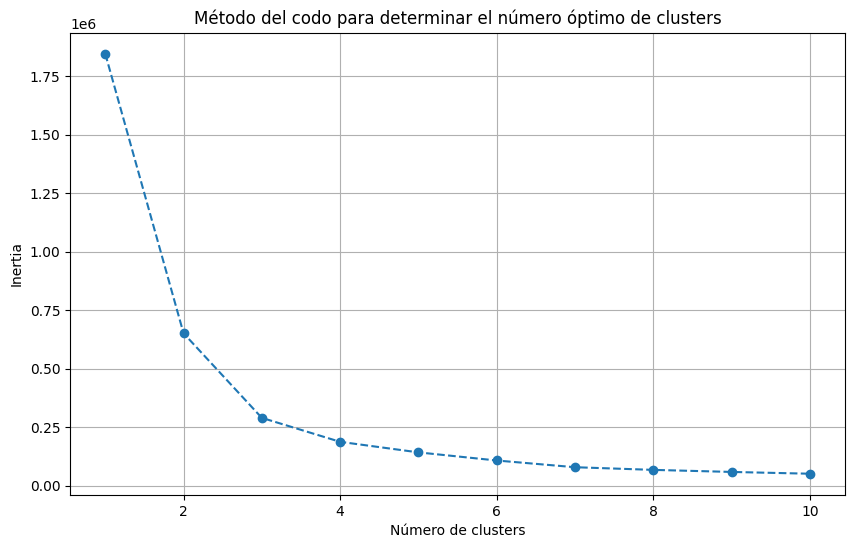

In [129]:

# Visualizar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [135]:

# Basándonos en el método del codo, ajustamos el modelo de clustering con el número óptimo de clusters
k_optimo = 10
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
paradas_bus['cluster'] = kmeans.fit_predict(X)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


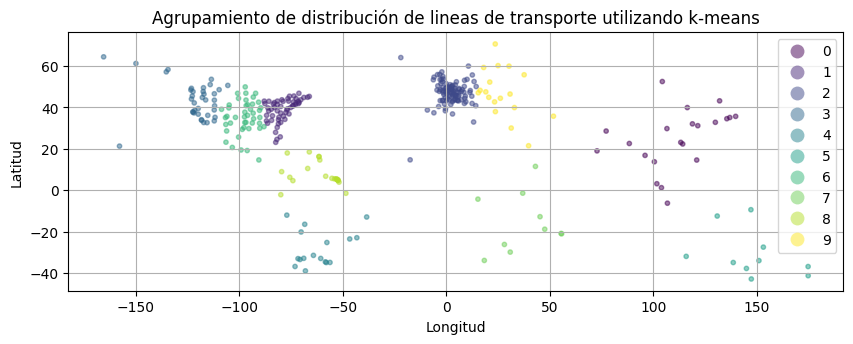

In [136]:
# Visualizar los clusters en el mapa
plt.figure(figsize=(10, 8))
paradas_bus.plot(column='cluster', categorical=True, legend=True, markersize=10, cmap='viridis', alpha=0.5, ax=plt.gca())
plt.title('Agrupamiento de distribución de lineas de transporte utilizando k-means')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()